<a href="https://colab.research.google.com/github/leovaldesz/Atividades-Aprendizagem-de-m-quina/blob/master/Semana%203/Semana_3_rede_neural_artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificação de casos de insuficiência cardíaca

* Dataset com atributos de pacientes que tiveram insuficiência cardíaca e um atributo classificador para se eles morreram ou não.
*   `https://www.kaggle.com/andrewmvd/heart-failure-clinical-data`

In [45]:
#Montando o ambiente
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [46]:
#ler CSV
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart_failure_clinical_records_dataset.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 1. Limpeza e organização dos dados

In [47]:
#Removendo NaN
dados.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## 2. Re-escala dos dados

In [48]:
#Utilizando o máximo e mínimo
dados = (dados - dados.min())/(dados.max() - dados.min())

## 3. Organizando dados para modelagem

In [49]:
#Dividindo em atributos descritores
X = dados.iloc[:,:len(dados.columns) - 1]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [50]:
#Dividindo os atributos de classe
y = dados.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

In [51]:
#Dividindo em dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
26,1.000000,1.0,0.011355,0.0,0.393939,1.0,0.207177,0.056180,0.714286,0.0,0.0,0.071174
256,0.454545,0.0,0.038658,0.0,0.363636,0.0,0.325979,0.134831,0.742857,0.0,0.0,0.768683
220,0.600000,0.0,0.071319,0.0,0.090909,0.0,0.288833,0.149438,0.600000,1.0,0.0,0.690391
290,0.090909,0.0,0.075529,1.0,0.621212,0.0,0.238696,0.033708,0.800000,0.0,0.0,0.900356
53,0.545455,1.0,0.005869,1.0,0.545455,1.0,0.395078,0.056180,0.600000,0.0,0.0,0.142349


In [52]:
y_train.head()

26     1.0
256    0.0
220    1.0
290    0.0
53     1.0
Name: DEATH_EVENT, dtype: float64

## 4. Definindo o algoritmo de aprendizagem

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
classificador = MLPClassifier(hidden_layer_sizes=(100), activation = 'logistic', max_iter = 1000)

In [55]:
classificador.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
classificacao = classificador.predict(X_test)
classificacao

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0.])

## 5. Avaliação do classificador

#### Acurácia

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
acuracia = accuracy_score(y_test, classificacao)
round(acuracia, 3)

0.867

A acurácia mostra a taxa de acertos do classificador, que no caso foi de 86%, esta taxa é alta mas como o domínio do problema trata da saúde de pessoas, seria idal uma acurácia maior. Pórem esta taxa de acerto é medida a partir dos dados separados para teste que pode ter problemas prejudicando ou ajudando nessa taxa.

#### Precisão

In [59]:
from sklearn.metrics import precision_score

In [60]:
precisao = precision_score(y_test, classificacao)
round(precisao, 3)

0.786

Esta medida mostra a taxa de positivos que realmente foram classificadas como positivos, e apesar de está proximo do 100% essa taxa é baixa, pois estamos falando de pessoas que tem mais chances de vir a falecer e o módulo classificador diz que ela não estão em perigo, então para o problema a precisão foi baixa.

#### Recall

In [61]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,classificacao)
round(recall,3)

0.688

Este item mede a taxa de instâncias positivas classificadas corretamente. Esta taxa é muito baixa, nem chega nos 80%, mostrando que o classificador não é muito confiável.

#### F1 - score

In [62]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,classificacao)
round(f1,3)

0.733

O F1-score traz um balanço entre a precisão e o recall. Apesar do resultado ser melhor que o recall, só mostra que o classifcador não está performando tão bem em relação a identificar positivos.

#### Curva ROC

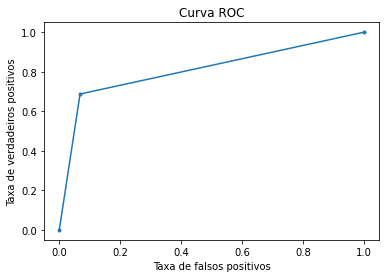

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, classificacao)

plt.plot(fpr, tpr, marker = '.')
plt.title('Curva ROC')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.show()

Com a plotagem da curva ROC podemos ver que a taxa de verdadeiros positivos não estça tão alta, provavelmente em algum lugar entre 0.6 e 0.8 e como foi visto nas medidas anteriores é próximo de 0.7

#### Área sob a curva (Area under de curve - AUC)

In [64]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, classificacao)
round(auc,3)

0.81

A interpretação númerica da curva ROC mostra que o resultado é 0.825

#### Validação cruzada

In [65]:
from sklearn.model_selection import cross_val_score

#definindo o modelo
classificador = MLPClassifier(hidden_layer_sizes = (100), activation = 'logistic', max_iter = 1000)

#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.63333333, 0.86666667, 0.86666667, 0.83333333, 0.93333333,
       0.9       , 0.86666667, 0.86666667, 0.7       , 0.68965517])

Aqui podemos ver que em um dos casos o score atingiu 0.93 em quanto em outro chegou a 0.63 mostrando que seria uma questão de sorte conseguir testar o modelo para que o score seja o mais alto, sendo que na maioria dos outos o score é baixo.

In [66]:
round(scores.mean(),3),round(scores.std(),3)

(0.816, 0.097)

Aqui mostra a média e o desvio padrão do scores, podemos perdeber que a média de 0.8 é relativamente baixa para o problema.

## 

## 6. Comparando MLP com Árvore de Decisão e Random Forest

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#criando a árvore
arvore = DecisionTreeClassifier()
#calcular scores
scores_arvore = cross_val_score(arvore,X,y,cv = 10)

#criando random forest
floresta = RandomForestClassifier()
#calcular scores
scores_floresta = cross_val_score(floresta,X,y,cv = 10)

#criando rede neural
mlp = MLPClassifier(hidden_layer_sizes = (100), activation='logistic', max_iter = 1000)
#calcular scores
scores_mlp = cross_val_score(mlp,X,y,cv = 10)

print('Árvore de Decisão: ', round(scores_arvore.mean(),3), round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3), round(scores.std(),3))
print('MLP: ', round(scores_mlp.mean(),3), round(scores_mlp.std(),3))

Árvore de Decisão:  0.699 0.153
Random Forest:  0.816 0.097
MLP:  0.806 0.094


Aqui podemos ver que o melhor classificador é a rede neural, que mesmo sendo o melhor não traz um bom resultado para o problema mostrado. E como já era de se esperar a Random Forest se saiu melhor que uma única árvore, pois a random como é um conjunto de árvores tem mais possibilidade de acerto. 

### 7. Otimizando Parâmetros

#### Random Search

In [68]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [ 
              {
                  'hidden_layer_sizes' : [(10),(50),(100),(50,10),(100,50)],
                  'activation' : ['identity','logistic','tanh','relu'],
                  'solver' : ['lbfgs', 'sgd', 'adam'],
                  'max_iter' : [500,1000,2000]
              }
]
import time
ini = time.time()

mlp = RandomizedSearchCV(MLPClassifier(), param_grid,cv = 5, scoring ='accuracy')
mlp.fit(X,y)
fim = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

In [69]:
print(mlp.best_params_)
print('Tempo de resposta do Randomized Search: {:.2f} segundos'.format(fim-ini))


{'solver': 'adam', 'max_iter': 500, 'hidden_layer_sizes': 100, 'activation': 'tanh'}
Tempo de resposta do Randomized Search: 28.61 segundos


Aqui encontramos os melhores parâmentros para a rede neural, dessa forma os parâmetros foram encontrados de forma aleatória, sendo não necessariamente os melhores possíveis, mas de uma forma aleatória de teste os melhores encontrados, essa forma tem menos custo computacional.

In [70]:
print(round(mlp.best_score_,3))

0.789


Aqui tem a score da rede, podemos ver que mesmo com o melhores parâmetros encotrados de forma aleatória o resultado não é bom, sendo até pior que alguns scores encontrados anteriormente

#### Grid Search

In [71]:
from sklearn.model_selection import GridSearchCV
ini = time.time()
mlp = GridSearchCV(MLPClassifier(), param_grid, cv = 5, scoring = 'accuracy')
mlp.fit(X,y)
fim = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [72]:

print(mlp.best_params_)
print('Tempo de resposta do Grid Search: {:.2f} segundos'.format(fim-ini))

{'activation': 'identity', 'hidden_layer_sizes': (100, 50), 'max_iter': 500, 'solver': 'adam'}
Tempo de resposta do Grid Search: 600.22 segundos


In [73]:
print(mlp.best_score_)

0.7989265536723164


In [74]:
mlp.cv_results_

{'mean_fit_time': array([0.01577539, 0.25515203, 0.31332221, 0.01185946, 0.48457479,
        0.39860168, 0.01092267, 0.57844267, 0.37119951, 0.02569971,
        0.51808176, 0.36163173, 0.02722368, 0.8618216 , 0.39350128,
        0.02414126, 0.89776239, 0.39511695, 0.03084459, 0.58133407,
        0.38699117, 0.0306098 , 0.96604271, 0.36548672, 0.0332119 ,
        1.09248362, 0.38009305, 0.03039188, 0.40189924, 0.20175037,
        0.02197061, 0.56509147, 0.17568293, 0.02161407, 0.58554864,
        0.18961825, 0.08061519, 0.9613019 , 0.26292014, 0.07147622,
        1.41577835, 0.2308064 , 0.08024788, 1.41772814, 0.24389825,
        0.10807304, 0.06737437, 0.35028462, 0.11839423, 0.05962305,
        0.68317461, 0.09063649, 0.06823473, 0.7903697 , 0.24005079,
        0.07138324, 0.82785211, 0.24118409, 0.07935677, 1.20755649,
        0.25286651, 0.05772243, 1.16976061, 0.45792027, 0.06439795,
        1.15493817, 0.46746197, 0.0619493 , 1.46861062, 0.43524957,
        0.07176695, 1.48108993,

O Grid Search apesar de ter um resultado melhor não é tanto assim, e o tempo de execução é muito alto, podendo ser até inviável usar esse método

## Interpretação final

O problema não foi bem resolvido com um classificador, isto pode se dar por diversos motivos, porém os mais prováveis são: 
* 1)O dataset é pequeno e com poucas diferenças tornando difícil a identificação das características que diferem os casos. E também com diferenças significativas entre a quantidade de ocorrências de uma classe e de outra.
* 2) Este problema pode ter influência externa que não está sendo colocada em nenhum dos atributos presentes, tornando assim impossível a análise do resultado levando em conta esses fatores.


---

Para melhorar isso seria necessário melhorar o dataset e refazer todos os passos para verificar se a mudança seria o suficiente para ajudar no classificador.